# Stable Diffusion XL Model

We ran the model provided by Stability AI: Stable Diffusion XL and the following VAE and adapted the prompt so that we could generate a girl in a unicorn onesie as close to our ideal character as possible:
- Stability AI. (2023). *stabilityai/stable-diffusion-xl-base-1.0* [Computer software]. Hugging Face. https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0
- MadeByOllin. (2023). *madebyollin/sdxl-vae-fp16-fix* [Computer software]. Hugging Face. https://huggingface.co/madebyollin/sdxl-vae-fp16-fix

### Set-Up: Check GPU and Load Packages

In [1]:
!nvidia-smi

Tue May 28 14:36:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0              37W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install git+https://github.com/huggingface/diffusers.git -q


In [3]:
!accelerate config default

Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


In [4]:
import torch, diffusers, transformers, accelerate 

(
    torch.__version__, diffusers.__version__, 
    transformers.__version__, accelerate.__version__
)

('2.1.2', '0.28.0.dev0', '4.39.3', '0.29.3')

### Run Model Pipeline

In [5]:
from diffusers import DiffusionPipeline
import torch
from diffusers import DiffusionPipeline, AutoencoderKL

vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16
)
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae, torch_dtype=torch.float16, variant="fp16",
    use_safetensors=True
)
_ = pipe.to("cuda")


2024-05-28 14:36:51.474426: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-28 14:36:51.474479: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-28 14:36:51.475940: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

### Run Prompt 1

  0%|          | 0/25 [00:00<?, ?it/s]

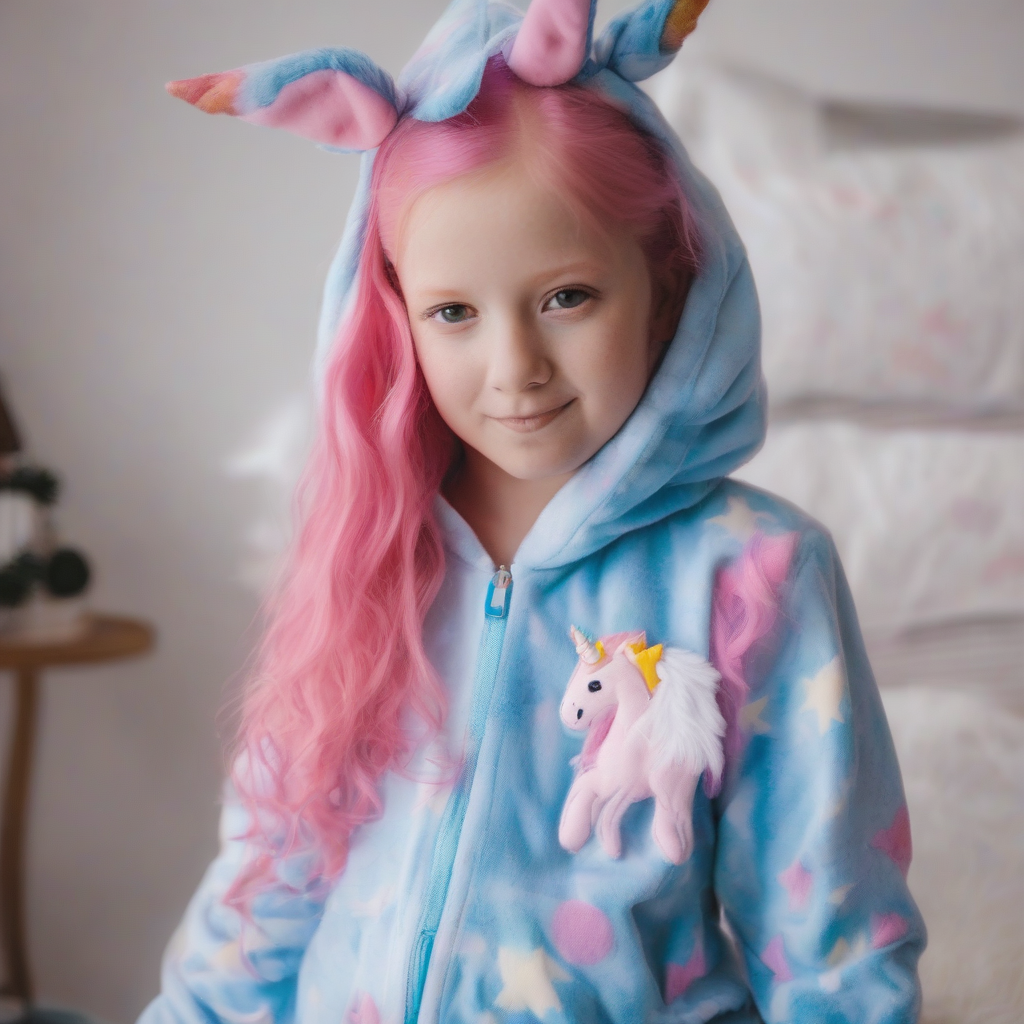

In [6]:
prompt = "a photo of girl in a blue unicorn onesie, pink hair"

image = pipe(prompt=prompt, num_inference_steps=25).images[0]
image


### Run Prompt 2 (Refined)

  0%|          | 0/25 [00:00<?, ?it/s]

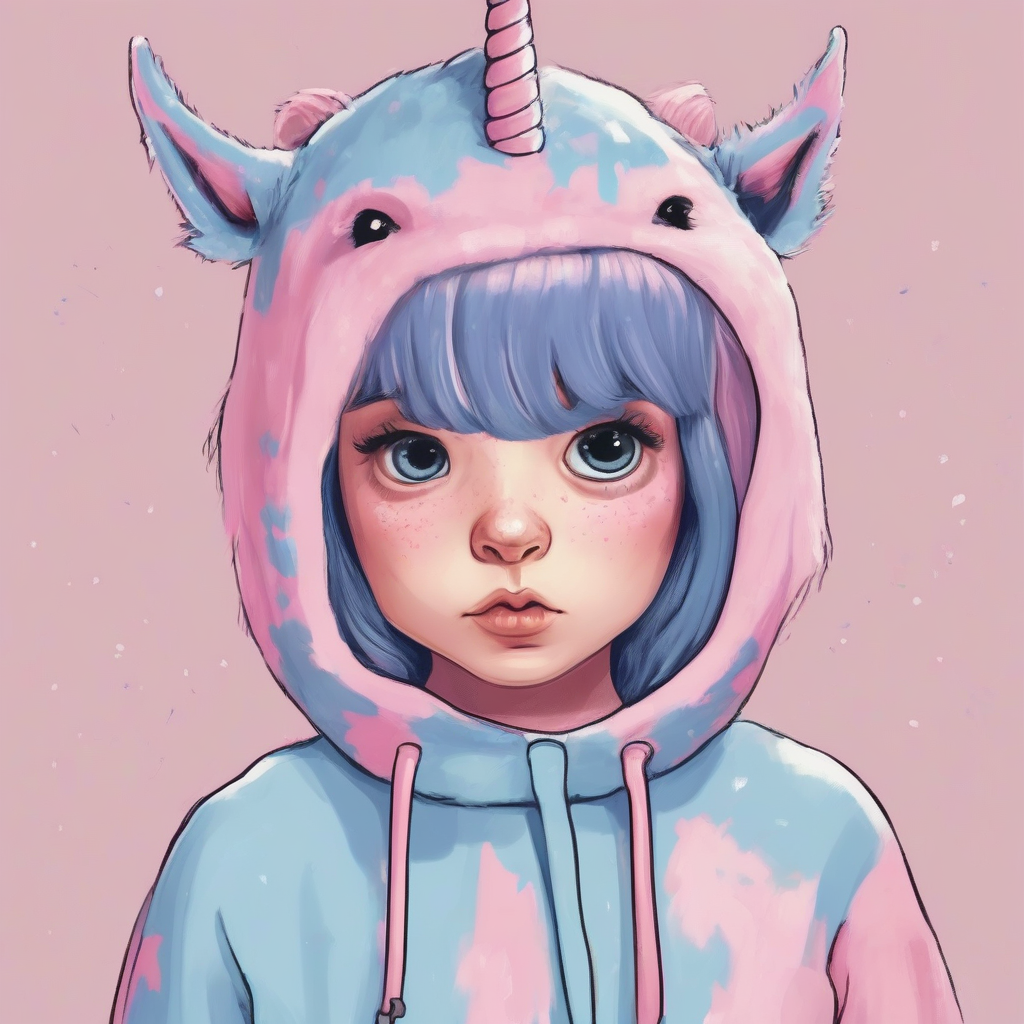

In [8]:
prompt = "a cartoon of girl in a blue unicorn onesie, short pink hair and bangs"

image = pipe(prompt=prompt, num_inference_steps=25).images[0]
image
